-Agent

-Enviroment

-State

-Action

-Reword

Q-Learning Algorithms - ReinForcement learning

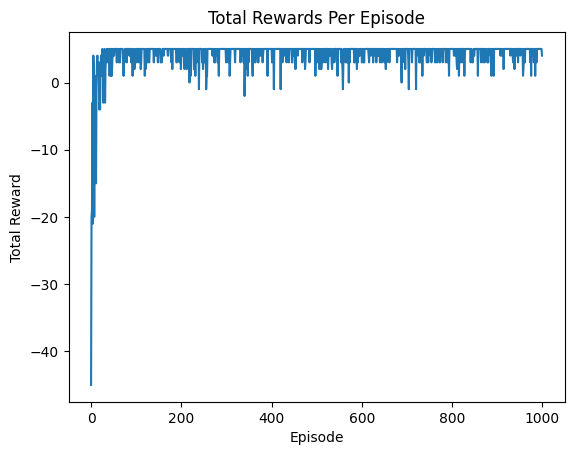

State (0, 0): [0.40722828 0.75442544 0.52166546 1.8098    ]
State (0, 1): [1.55061283 3.122      0.43884252 2.62028212]
State (0, 2): [-0.38499754  4.56461168 -0.41857177 -0.29643314]
State (0, 3): [-0.3940399   5.1261294  -0.40926069 -0.3940399 ]
State (1, 0): [-0.99044534 -1.29117626 -1.05695394  3.04840069]
State (1, 1): [1.61008844 2.25974285 1.09068637 4.58      ]
State (1, 2): [2.76752042 5.08838887 2.41756214 6.2       ]
State (1, 3): [1.77915185 8.         4.34075123 5.90264032]
State (2, 0): [-0.78196668 -0.7647422  -0.77248303 -0.48915272]
State (2, 1): [ 0.24924834  4.84812093 -0.53646753  0.27166145]
State (2, 2): [0.70900998 1.90586174 0.09687565 7.93508516]
State (2, 3): [ 4.96824277 10.          5.28281583  6.50821189]
State (3, 0): [-0.42501294 -0.3940399  -0.3940399   0.06227672]
State (3, 1): [-0.199       0.28829183 -0.109       7.51307661]
State (3, 2): [-0.1         1.14666137  0.37739183  9.92144833]
State (3, 3): [0. 0. 0. 0.]


In [ ]:
import numpy as np
import matplotlib.pyplot as plt

# Define the environment
class Gridworld:
    def __init__(self, size=4):
        self.size = size
        self.state = (0, 0)  # Start position
        self.goal = (size - 1, size - 1)
        self.actions = ['up', 'down', 'left', 'right']
        self.action_space = len(self.actions)

    def reset(self):
        self.state = (0, 0)
        return self.state

    def step(self, action):
        x, y = self.state
        if action == 'up':
            x = max(x - 1, 0)
        elif action == 'down':
            x = min(x + 1, self.size - 1)
        elif action == 'left':
            y = max(y - 1, 0)
        elif action == 'right':
            y = min(y + 1, self.size - 1)
        self.state = (x, y)

        if self.state == self.goal:
            return self.state, 10, True  # Goal reached, reward = 10
        else:
            return self.state, -1, False  # Penalty for every step

# Q-Learning Algorithm
def q_learning(env, episodes=500, alpha=0.1, gamma=0.9, epsilon=0.1):
    Q = np.zeros((env.size, env.size, env.action_space))
    rewards = []

    for episode in range(episodes):
        state = env.reset()
        total_reward = 0
        done = False

        while not done:
            # Epsilon-greedy action selection
            if np.random.random() < epsilon:
                action_idx = np.random.choice(env.action_space)  # Exploration
            else:
                action_idx = np.argmax(Q[state[0], state[1]])  # Exploitation

            action = env.actions[action_idx]
            next_state, reward, done = env.step(action)
            total_reward += reward

            # Update Q-value
            current_q = Q[state[0], state[1], action_idx]
            max_future_q = np.max(Q[next_state[0], next_state[1]])
            Q[state[0], state[1], action_idx] = current_q + alpha * (reward + gamma * max_future_q - current_q)

            state = next_state

        rewards.append(total_reward)

    return Q, rewards

# Initialize the environment
env = Gridworld(size=4)

# Train the agent
Q, rewards = q_learning(env, episodes=1000)

# Visualize the total rewards per episode
plt.plot(rewards)
plt.title("Total Rewards Per Episode")
plt.xlabel("Episode")
plt.ylabel("Total Reward")
plt.show()

# Display the learned Q-values
for i in range(env.size):
    for j in range(env.size):
        print(f"State ({i}, {j}): {Q[i, j]}")
